# Instalação

In [1]:
import sys
exe_easyplot_path = r'C:\Users\wande\OneDrive\Documentos\GitHub\EASYPLOTPYDEV\easyplot_toolbox'
# exe_easyplot_path = '/home/nero/git-hub projects/EASYPLOTPYDEV/easyplot_toolbox/'
sys.path.append(exe_easyplot_path)
from easyplot import *

### **Dados AG**

In [2]:
import os
import pandas as pd
import numpy as np

# Defina o caminho da pasta onde estão os arquivos Excel
pasta = r'C:\Users\wande\OneDrive\Documentos\GitHub\EASYPLOTPYDEV\result_AG'
melhor = np.inf
melhor_hist = []

# Percorra todos os arquivos na pasta
for arquivo in os.listdir(pasta):
    # Verifique se o arquivo é um arquivo Excel
    if arquivo.endswith('.xlsx') or arquivo.endswith('.xls'):
        # Construa o caminho completo do arquivo
        caminho_arquivo = os.path.join(pasta, arquivo)
        
        # Carregue o arquivo Excel usando pandas
        dados_excel = pd.read_excel(caminho_arquivo)

        # Melhor resultado
        ultimo_result = dados_excel['OF BEST'].iloc[-1]
        melhor_hist.append(ultimo_result)

        if ultimo_result < melhor:
            melhor = ultimo_result
            melhor_arq = caminho_arquivo
        else:
            pass
print("melhor rodada: ", melhor_arq, "\nmelhor result of: ", melhor)

melhor rodada:  C:\Users\wande\OneDrive\Documentos\GitHub\EASYPLOTPYDEV\result_AG\of-ga-finning-tune-result-0-output.xlsx 
melhor result of:  7.77627935672932


In [3]:
import statistics

# Lista de resultados
resultados = melhor_hist.copy()

# Calculando a média
media = statistics.mean(resultados)

# Calculando o desvio padrão
desvio_padrao = statistics.stdev(resultados)

# Encontrando o valor mínimo e máximo
minimo = min(resultados)
maximo = max(resultados)

print("Média:", media)
print("Desvio Padrão:", desvio_padrao)
print("Valor Mínimo:", minimo)
print("Valor Máximo:", maximo)  


Média: 21.026108886299426
Desvio Padrão: 8.824144574617486
Valor Mínimo: 7.77627935672932
Valor Máximo: 47.1197811178987


### **Plotando o gráfico do AG - Comportamento OF**

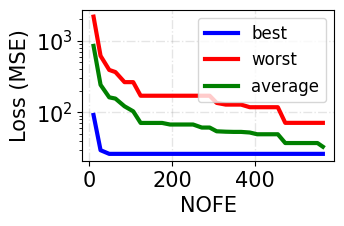

In [4]:
# Data statement
dados_excel = pd.read_excel(caminho_arquivo)
df =  {
        'y0': list(dados_excel['OF BEST']),
        'x0': list(dados_excel['neof']),
        'y1': list(dados_excel['OF WORST']),
        'x1': list(dados_excel['neof']),
        'y2': list(dados_excel['OF AVG']),
        'x2': list(dados_excel['neof'])
      }

# Chart setup
chart_config = {
                'name': 'AG-OF-BEST',
                'width': 9.0, 
                'height': 6.0,
                'extension': 'png',
                'dots per inch': 600, 
                'marker': [None, None, None],
                'marker size': [None, None, None],
                'line width': [3, 3, 3],
                'line style': ['-', '-', '-'],
                'x axis label': 'NOFE',
                'x axis size': 15,
                'y axis label': 'Loss (MSE)',
                'y axis size': 15,
                'axises color': 'black',
                'labels size': 15,
                'labels color': 'black',
                'chart color': ['blue', 'red', 'green'],
                'on grid?': True,
                'legend': ['best', 'worst', 'average'], 
                'legend location': 'upper right',
                'x limit': None,
                'y limit': None,
                'size legend': 12,
                'y log': True,
                'x log': False,
            }

# Call function
line_chart(dataset=df, plot_setup=chart_config)

### **Plotando o gráfico do AG - Histograma OF**

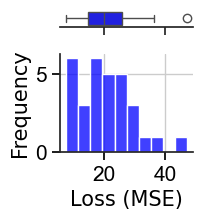

In [5]:
# Chart config
chart_config = {
              'name': "AG-OF-BEST-HISTOGRAM",
              'width': 6., 
              'height': 6.,
              'extension': 'png',
              'dots per inch': 600,
              'x axis label': 'Loss (MSE)',
              'x axis size': 15,
              'y axis label': 'Frequency',
              'y axis size': 15,
              'axises color': 'black',
              'labels size': 15,
              'labels color': 'black', 
              'chart color': 'blue',
              'bins': 10,
             }

# Call function
histogram_chart(dataset=melhor_hist, plot_setup=chart_config)

In [6]:
# x = 4,021560585 2,409587084 0,02372663835 683,6734723

IndexError: list index out of range

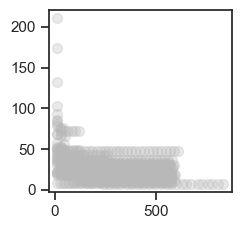

In [7]:
df = {}
color = []
num = []
cont = 0

# Percorra todos os arquivos na pasta
for arquivo in os.listdir(pasta):
    # Verifique se o arquivo é um arquivo Excel
    if arquivo.endswith('.xlsx') or arquivo.endswith('.xls'):
        # Construa o caminho completo do arquivo
        caminho_arquivo = os.path.join(pasta, arquivo)
        
        # Carregue o arquivo Excel usando pandas
        dados_excel = pd.read_excel(caminho_arquivo)

        # Melhor resultado
        df[f'x{cont}'] = list(dados_excel['neof'])
        df[f'y{cont}'] = list(dados_excel['OF BEST'])
        if dados_excel['OF BEST'].iloc[-1] < 15:
            color.append('#B8B8B8')
            num.append(1)
        else:
            color.append('#B8B8B8')
    cont += 1

# Chart setup
chart_config = {
                'name': 'AG-best-scatter',
                'width': 6.0, 
                'height': 6.0,
                'dots per inch': 600, 
                'extension': 'png',
                'marker size': 50,
                'color map': color,
                'x axis label': 'NOFE',
                'x axis size': 15,
                'y axis label': 'Loss (MSE)',
                'y axis size': 15,
                'axises color': 'black', 
                'labels size': 15,
                'labels color': 'black',
                'on grid?': False,
                'y log': False,
                'x log': False,
                'legend': [None]*30,
                'legend location': None,
                'size legend': 12,
               }

# Call function
scatter_chart(dataset=df, plot_setup=chart_config)
print(sum(num)/30*100, sum(num))

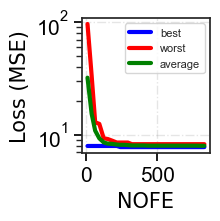

In [9]:
# Data statement
dados_excel = pd.read_excel(r'C:\Users\wande\OneDrive\Documentos\GitHub\EASYPLOTPYDEV\result_AG\of-ga-finning-tune-result-0-output.xlsx')
df =  {
        'y0': list(dados_excel['OF BEST']),
        'x0': list(dados_excel['neof']),
        'y1': list(dados_excel['OF WORST']),
        'x1': list(dados_excel['neof']),
        'y2': list(dados_excel['OF AVG']),
        'x2': list(dados_excel['neof'])
      }

# Chart setup
chart_config = {
                'name': 'AG-OF-BEST-FINE',
                'width': 6.0, 
                'height': 6.0,
                'extension': 'png',
                'dots per inch': 600, 
                'marker': [None, None, None],
                'marker size': [None, None, None],
                'line width': [3, 3, 3],
                'line style': ['-', '-', '-'],
                'x axis label': 'NOFE',
                'x axis size': 15,
                'y axis label': 'Loss (MSE)',
                'y axis size': 15,
                'axises color': 'black',
                'labels size': 15,
                'labels color': 'black',
                'chart color': ['blue', 'red', 'green'],
                'on grid?': True,
                'legend': ['best', 'worst', 'average'], 
                'legend location': 'upper right',
                'x limit': None,
                'y limit': None,
                'size legend': 8,
                'y log': True,
                'x log': False,
            }

# Call function
line_chart(dataset=df, plot_setup=chart_config)